In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_excel("sample_data/Retail Data.csv.xlsx")

1. View the structure of the dataset (columns, types, missing values)

In [39]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order No           5000 non-null   object        
 1   Order Date         5000 non-null   datetime64[ns]
 2   Customer Name      5000 non-null   object        
 3   Address            4999 non-null   object        
 4   City               5000 non-null   object        
 5   State              5000 non-null   object        
 6   Customer Type      5000 non-null   object        
 7   Account Manager    5000 non-null   object        
 8   Order Priority     5000 non-null   object        
 9   Product Name       5000 non-null   object        
 10  Product Category   5000 non-null   object        
 11  Product Container  5000 non-null   object        
 12  Ship Mode          5000 non-null   object        
 13  Ship Date          5000 non-null   datetime64[ns]
 14  Cost Pri

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,2014-09-02,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,...,$156.50,$300.97,$144.47,23.0,"$4,533.52",0.02,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,2015-10-24,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,...,$0.24,$1.26,$1.02,8.0,$45.20,0.03,$0.00,$45.90,$0.70,$46.91
2,5004-1,2014-03-13,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,...,$42.11,$80.98,$38.87,45.0,$873.32,0.04,$72.23,$837.57,$7.18,$82.58
3,5009-1,2013-02-18,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,...,$5.33,$8.60,$3.27,16.0,$73.52,0.01,$4.35,$740.67,$6.19,$730.92
4,5010-1,2014-09-13,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,...,$1.53,$2.78,$1.25,49.0,$138.46,0.07,$5.95,$123.77,$1.34,$125.97


2. What is the shape (rows, columns) of the dataset?

In [24]:
df.shape

(5000, 24)

3. Are there any duplicate records?

In [27]:
df.duplicated().sum()

np.int64(0)

4. Are there any missing or corrupted entries in Ship Date, Order Date, or numeric
columns?

In [ ]:
df[['Order Date', 'Ship Date', 'Order Quantity']].isnull().sum()

Order Date        0
Ship Date         0
Order Quantity    1
dtype: int64

5. Convert Order Date and Ship Date to datetime.

In [40]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

print(df[['Order Date', 'Ship Date']].dtypes)
df[['Order Date', 'Ship Date']].head()

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


,Order Date,Ship Date
0,2014-09-02,2014-09-04
1,2015-10-24,2015-10-26
2,2014-03-13,2014-03-13
3,2013-02-18,2013-02-20
4,2014-09-13,2014-09-17


6. Check for future or inconsistent shipping dates.


In [ ]:
inconsistent_dates = df[df['Ship Date'] < df['Order Date']]
future_dates = df[df['Ship Date'] > pd.Timestamp.today()]

print("Inconsistent shipping dates:", inconsistent_dates.shape[0])
print("Future shipping dates:", future_dates.shape[0])

Inconsistent shipping dates: 24
Future shipping dates: 0


7. Convert price columns to numeric (remove $ and commas).


In [46]:
price_cols = ['Cost Price', 'Retail Price', 'Profit Margin', 'Sub Total',
              'Discount %', 'Discount $', 'Order Total', 'Shipping Cost', 'Total']

for col in price_cols:
    df[col] = df[col].replace(r'[\$,%]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[price_cols].head()

,Cost Price,Retail Price,Profit Margin,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,156.50,300.97,144.47,4533.52,0.02,194.83,4757.22,7.18,4291.55
1,0.24,1.26,1.02,45.20,0.03,0.00,45.90,0.70,46.91
2,42.11,80.98,38.87,873.32,0.04,72.23,837.57,7.18,82.58
3,5.33,8.60,3.27,73.52,0.01,4.35,740.67,6.19,730.92
4,1.53,2.78,1.25,138.46,0.07,5.95,123.77,1.34,125.97


8. What are the unique values in Customer Type and Order Priority?


In [ ]:
print("Unique Customer Types:", df['Customer Type'].unique())
print("Unique Order Priorities:", df['Order Priority'].unique())

Unique Customer Types: ['Small Business' 'Corporate' 'Consumer' 'Home Office']
Unique Order Priorities: ['Critical' 'Medium' 'Not Specified' 'Low' 'High']


9. What are the most common shipping modes?

Ship Mode
Regular Air       4236
Express Air        647
Delivery Truck     117
Name: count, dtype: int64


/tmp/ipython-input-3676335522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Ship Mode', data=df, palette='Reds')


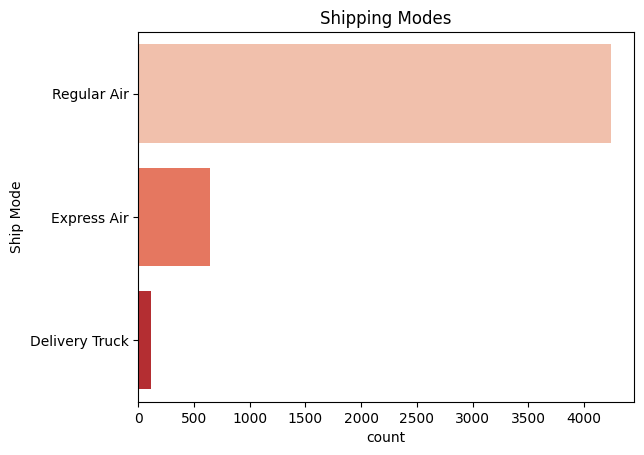

In [53]:
print(df['Ship Mode'].value_counts())

sns.countplot(y='Ship Mode', data=df, palette='Reds')
plt.title("Shipping Modes")
plt.show()

10. Which cities have the highest number of orders?


City
Sydney       3584
Melbourne    1416
Name: count, dtype: int64


/tmp/ipython-input-2581477423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Greens_r')


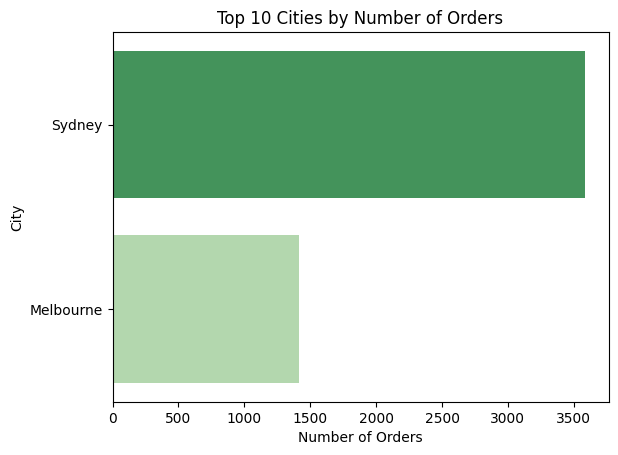

In [55]:
top_cities = df['City'].value_counts().head(10)
print(top_cities)

sns.barplot(x=top_cities.values, y=top_cities.index, palette='Greens_r')
plt.title("Top 10 Cities by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.show()

11. What’s the range of order quantities and prices?


In [43]:
print("Order Quantity Summary:\n", df['Order Quantity'].describe())
print("\nRetail Price Summary:\n", df['Retail Price'].describe())

Order Quantity Summary:
 count    4999.000000
mean       26.483097
std        14.391863
min         1.000000
25%        13.000000
50%        27.000000
75%        39.000000
max        50.000000
Name: Order Quantity, dtype: float64

Retail Price Summary:
 count      5000
unique      139
top       $2.88
freq        188
Name: Retail Price, dtype: object


12. Create a new column for shipping duration.


In [42]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
print("Shipping Duration column added.\n")
print(df[['Order Date', 'Ship Date', 'Shipping Duration']].head())

Shipping Duration column added.

  Order Date  Ship Date  Shipping Duration
0 2014-09-02 2014-09-04                  2
1 2015-10-24 2015-10-26                  2
2 2014-03-13 2014-03-13                  0
3 2013-02-18 2013-02-20                  2
4 2014-09-13 2014-09-17                  4


13. Are there any orders with zero or negative total or quantity?


In [47]:
invalid_orders = df[(df['Total'] <= 0) | (df['Order Quantity'] <= 0)]
print(f"Orders with zero or negative total/quantity: {invalid_orders.shape[0]}")
invalid_orders.head()

Orders with zero or negative total/quantity: 0


,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,Shipping Duration


14. Are all discount percentages matching discount dollar amounts?


In [48]:
df['Expected Discount $'] = (df['Discount %'] / 100) * df['Sub Total']
mismatch_discounts = df[np.abs(df['Discount $'] - df['Expected Discount $']) > 1]

print("Discount mismatches found:", mismatch_discounts.shape[0])
mismatch_discounts[['Discount %', 'Discount $', 'Expected Discount $']].head()

Discount mismatches found: 4239


,Discount %,Discount $,Expected Discount $
0,0.02,194.83,0.906704
2,0.04,72.23,0.349328
3,0.01,4.35,0.007352
4,0.07,5.95,0.096922
5,0.08,12.98,0.157888


15. Check for mismatches in total calculation’


In [ ]:
df['Expected Total'] = df['Order Total'] + df['Shipping Cost'] - df['Discount $']
mismatch_total = df[np.abs(df['Expected Total'] - df['Total']) > 1]

print("Mismatched total records:", mismatch_total.shape[0])
mismatch_total[['Order Total', 'Shipping Cost', 'Discount $', 'Expected Total', 'Total']].head()

Mismatched total records: 4400


,Order Total,Shipping Cost,Discount $,Expected Total,Total
0,4757.22,7.18,194.83,4569.57,4291.55
2,837.57,7.18,72.23,772.52,82.58
3,740.67,6.19,4.35,742.51,730.92
4,123.77,1.34,5.95,119.16,125.97
5,183.58,11.15,12.98,181.75,189.43


16. Identify top 5 products by order quantity.


In [ ]:
top_products = df.groupby('Product Name')['Order Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Order Quantity:\n", top_products)

Top 5 Products by Order Quantity:
 Product Name
Artisan 474 Labels                         3395.0
Smiths General Use 3-Ring Binders          3220.0
Artisan 479 Labels                         3039.0
Artisan 481 Labels                         2996.0
Apex Preferred Stainless Steel Scissors    2896.0
Name: Order Quantity, dtype: float64


17. Which Account Manager handled the most revenue?


In [ ]:
revenue_by_manager = df.groupby('Account Manager')['Total'].sum().sort_values(ascending=False)
print("Top 5 Account Managers by Revenue:\n", revenue_by_manager.head(5))

Top 5 Account Managers by Revenue:
 Account Manager
Connor Betts    $82.58$189.45$121.03$79.44$69.36$54.22$35.33$4...
Phoebe Gour     $730.92$23.46$4,764.51$4,764.51$4,764.51$54.22...
Oanya Zhang                                                $73.57
Yvette Biti     $694.05$694.05$112.38$112.38$112.38$112.38$123...
Mihael Khan     $60.45$274.97$54.22$34.43$418.99$129.53$362.47...
Name: Total, dtype: object


18. What is the average shipping cost by mode?


In [ ]:
avg_ship_cost = df.groupby('Ship Mode')['Shipping Cost'].mean()
print("Average Shipping Cost by Mode:\n", avg_ship_cost)

Average Shipping Cost by Mode:
 Ship Mode
Delivery Truck    5.270085
Express Air       5.247311
Regular Air       5.503553
Name: Shipping Cost, dtype: float64


19. Find the most profitable product.


In [50]:
df['Profit'] = df['Total'] - (df['Cost Price'] * df['Order Quantity'])
most_profitable = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5)
print("Top 5 Most Profitable Products:\n", most_profitable)

Top 5 Most Profitable Products:
 Product Name
Adesso Programmable 142-Key Keyboard    181893.39
UGen Ultra Cordless Optical Suite        65534.29
Economy Rollaway Files                   57956.59
600 Series Non-Flip                      55763.65
Multimedia Mailers                       41111.95
Name: Profit, dtype: float64


20. Find the most profitable product.

In [51]:
print("Most Profitable Product Overall:")
print(most_profitable.head(1))

Most Profitable Product Overall:
Product Name
Adesso Programmable 142-Key Keyboard    181893.39
Name: Profit, dtype: float64
